## Load Data and Explore Basic Statistics

In [1]:
# Basic data libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling and evaluation metric libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Cleaning up Display for Fitted Models
from sklearn import set_config
set_config(display='text')

Our team chose the student performance dataset for our project. The most important feature that we would like to study is the `Exam_Score` column, which records the final exam score for each student. We are interested in using the other features in our dataset to try to predict a student's final exam score.

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Data Cleaning

There are three columns with missing values: Teacher Quality, Parental Education Level, and Distance from Home

We believe that the Distance from Home column is not a significant factor for determining a student's exam score (see boxplot below). Thus, we have decided to drop this column completely from our dataset, which will allow us to keep more rows from the original data.

The total number of missing values among the other two columns is 164, which only accounts for 2.48% of the data. We believe that this is not a significant amount, and therefore, we have decided to drop these rows. After doing this, we would still have 6,443 out of the original 6,607 data points.

Analyzing the numeric variables, the only unusual value that we observed is a single Exam Score of 101. We don't know exactly what caused this value, but we are going to change it to 100 because we want our exam scores to range from 0 to 100.

<Axes: xlabel='Distance_from_Home', ylabel='Exam_Score'>

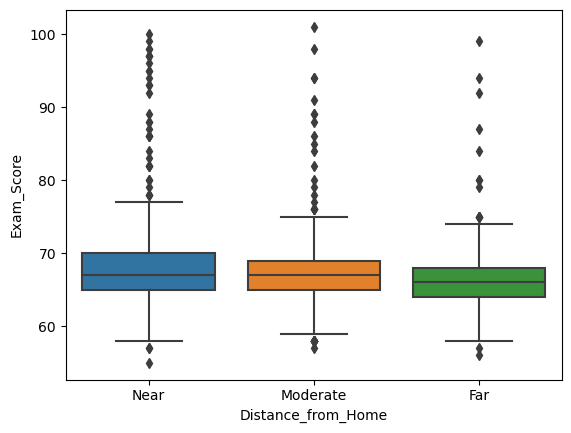

In [6]:
sns.boxplot(data=df, x='Distance_from_Home', y='Exam_Score')

In [7]:
df.groupby('Distance_from_Home')['Exam_Score'].mean()

Distance_from_Home
Far         66.457447
Moderate    66.981481
Near        67.512101
Name: Exam_Score, dtype: float64

The boxplot above shows very similar values between the exam scores across students' distance between home and school. This is confirmed by the similarity in the mean exam scores across this variable, so we are okay dropping this column completely.

In [8]:
df.drop(columns = 'Distance_from_Home', inplace=True)

In [9]:
# Number of rows with missing values remaining
df.loc[df.isna().any(axis=1), ['Teacher_Quality', 'Parental_Education_Level']].shape[0]

164

In [10]:
# Percent of rows with missing values
164*100/6607

2.4822158316936584

In [11]:
# Remaining number of rows if we dropped all missing values
6607-164

6443

In [12]:
df.dropna(inplace=True)

In [13]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6443.000000,6443.000000,6443.000000,6443.000000,6443.000000,6443.000000,6443.000000
mean,19.969424,80.000000,7.032594,75.068446,1.495111,2.970666,67.244762
std,5.982472,11.551553,1.467814,14.407478,1.233686,1.029935,3.908274
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


The only unusual number from this table is that a student earned an exam score of 101. All other range of values seem plausible.

In [14]:
df.loc[df['Exam_Score'] > 100, 'Exam_Score'] = 100

## Exploratory Data Analysis

In [15]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

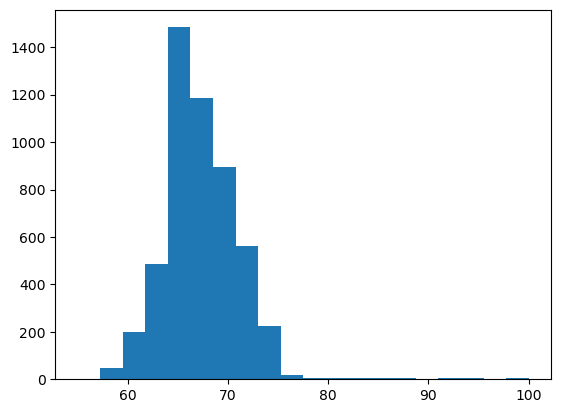

In [16]:
plt.hist(df_train['Exam_Score'], bins=20)
plt.show()

The distribution of exam scores is skewed to the right with a median of 67 and mean of 67.26

Let's now take a look at the correlations between the numeric variables in our dataset.

In [17]:
df_train.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009414,0.004820,0.033195,-0.010082,0.005573,0.435491
Attendance,-0.009414,1.000000,-0.021410,-0.020997,0.015123,-0.031689,0.568773
Sleep_Hours,0.004820,-0.021410,1.000000,-0.013502,-0.012953,-0.005483,-0.026231
Previous_Scores,0.033195,-0.020997,-0.013502,1.000000,-0.022923,-0.004263,0.180379
Tutoring_Sessions,-0.010082,0.015123,-0.012953,-0.022923,1.000000,0.015809,0.162853
Physical_Activity,0.005573,-0.031689,-0.005483,-0.004263,0.015809,1.000000,0.025508
Exam_Score,0.435491,0.568773,-0.026231,0.180379,0.162853,0.025508,1.000000


<Axes: >

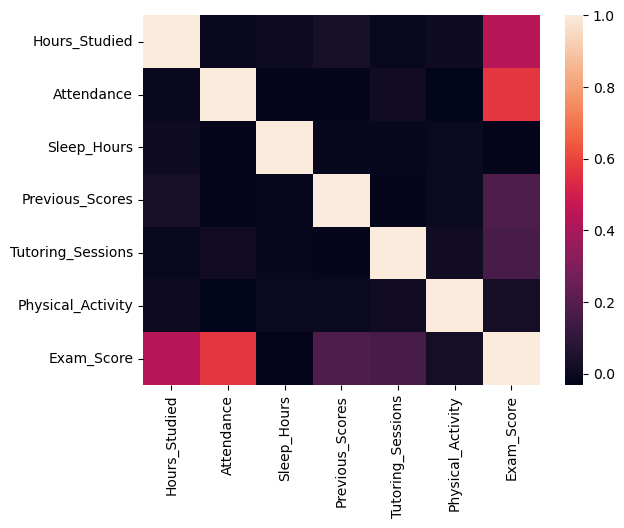

In [18]:
sns.heatmap(df_train.corr())

There do not appear to be any strong correlations among the numeric variables. There is a slightly positive correlation between attendance and exam score as well as hours studied and exam score.

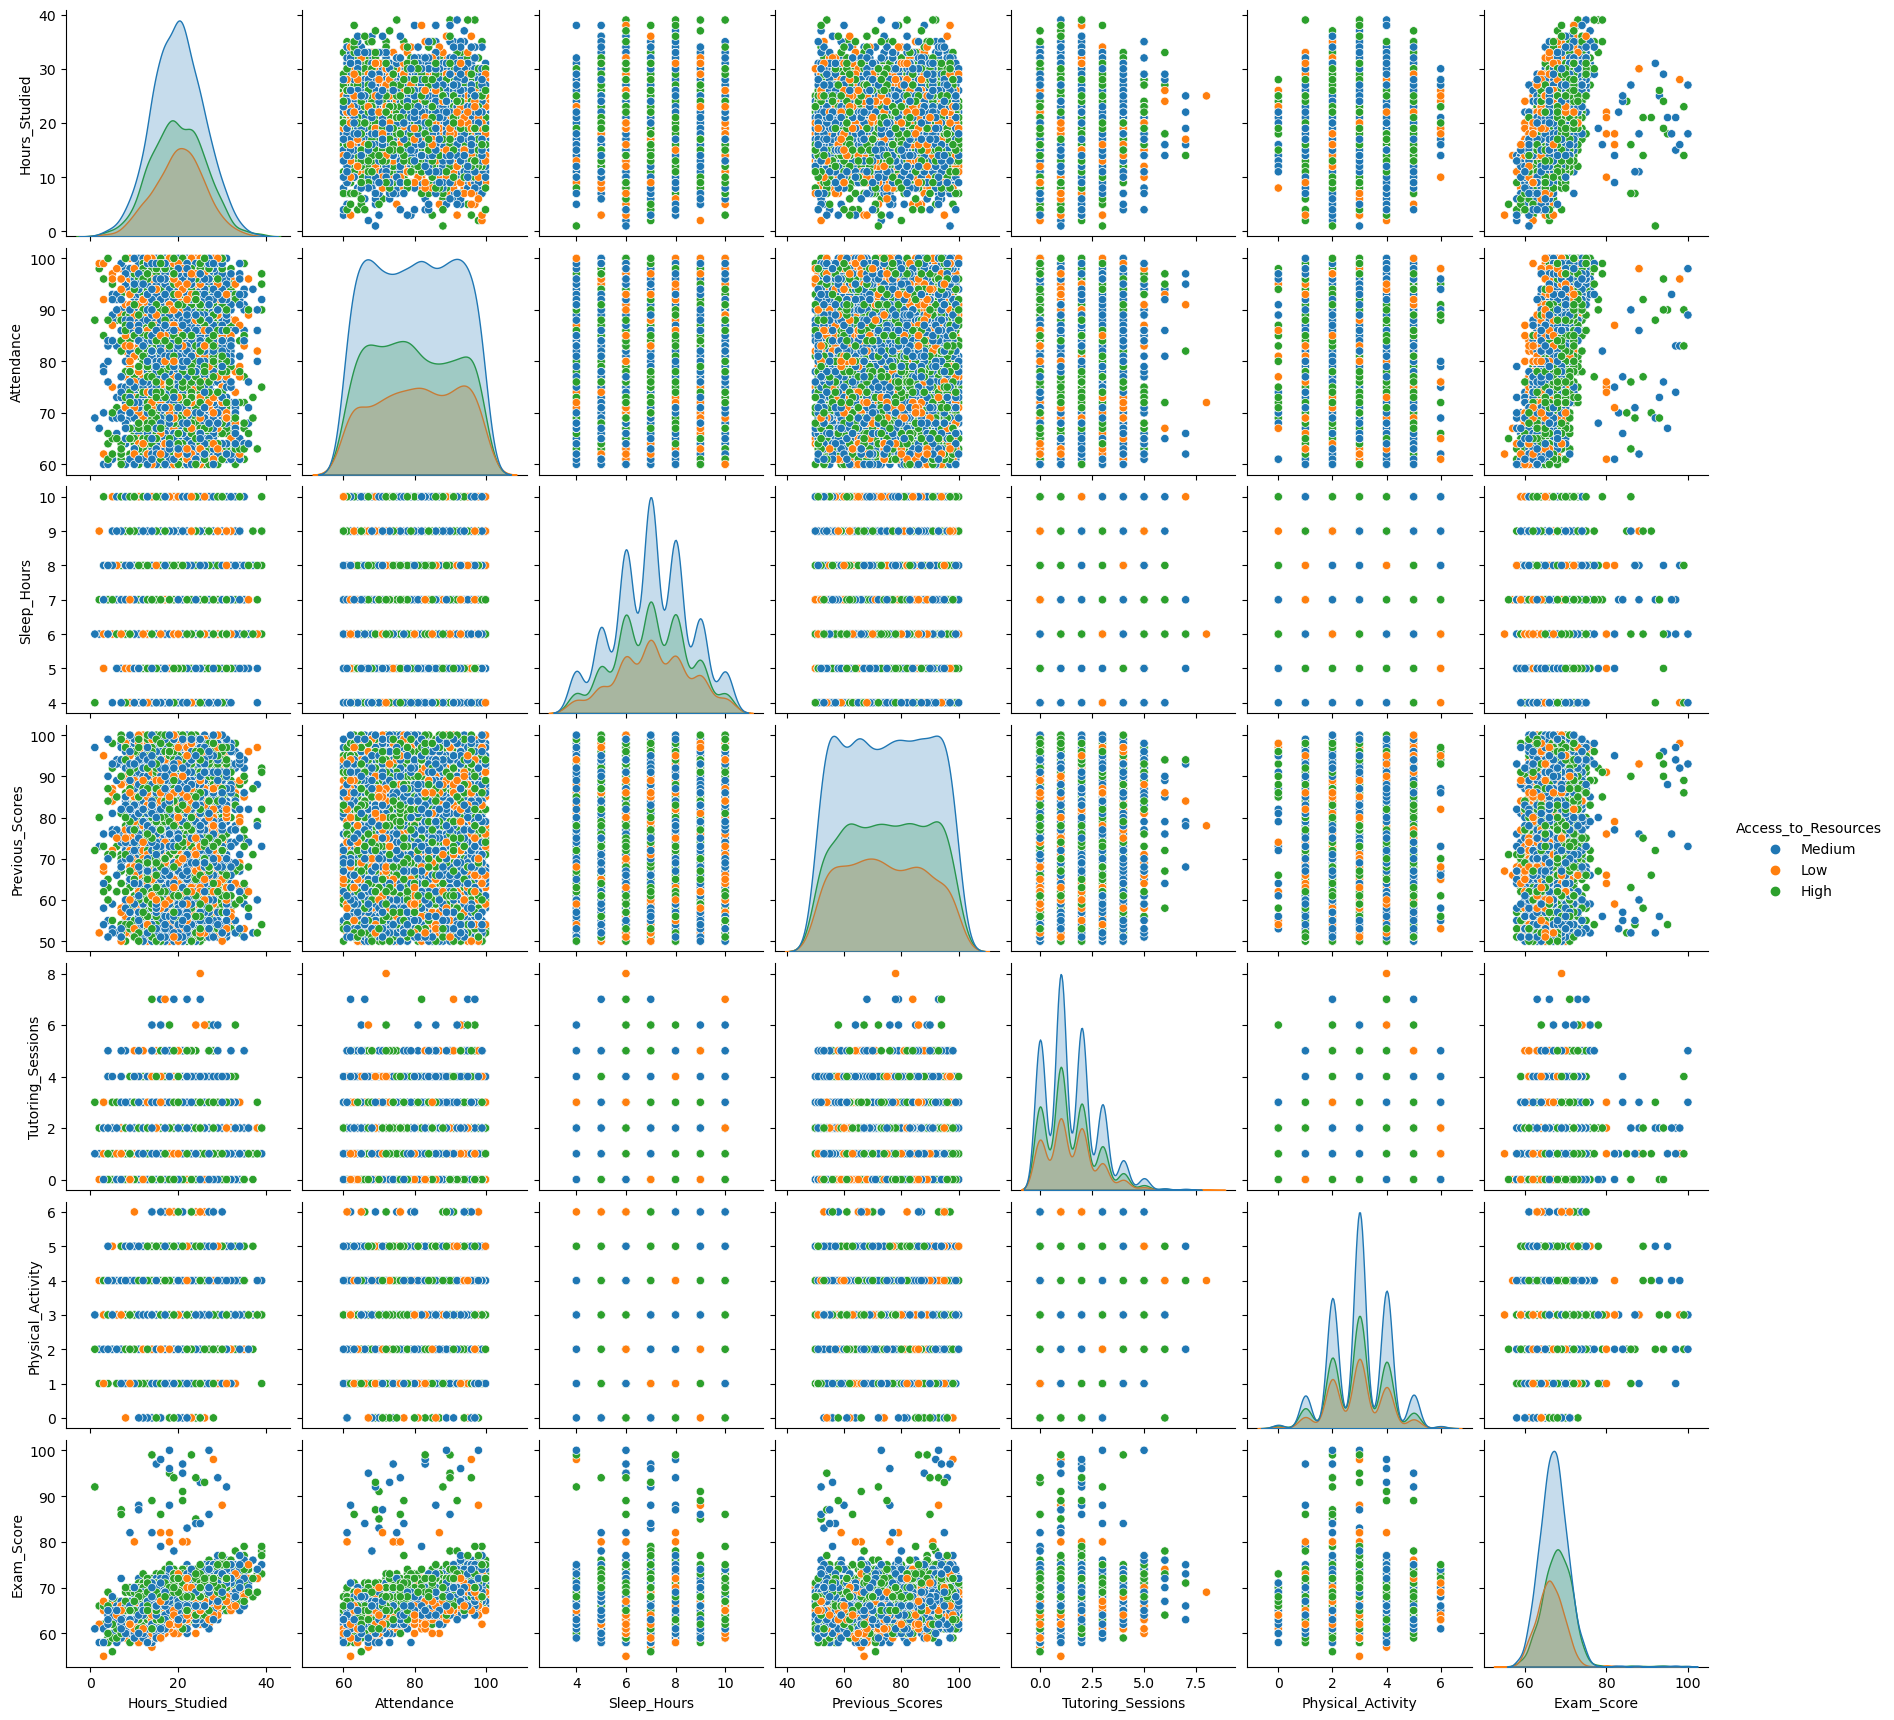

In [19]:
sns.pairplot(df_train, hue = 'Access_to_Resources')
plt.show()

There seems to be some sort of separation/difference among the exam scores of students based on the students' access to resources. We can see this further in the boxplot below. It seems that students with higher access to resources score slightly better on their exams.

<Axes: xlabel='Access_to_Resources', ylabel='Exam_Score'>

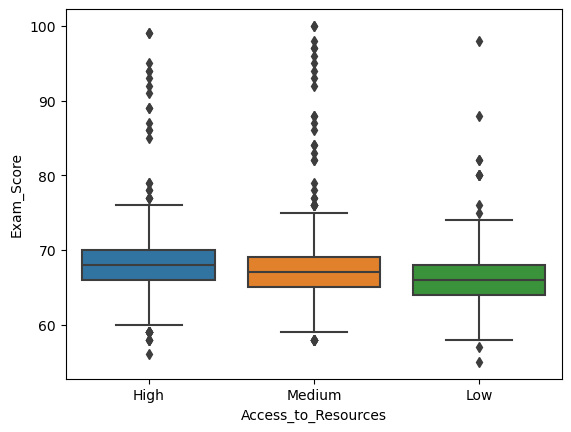

In [20]:
sns.boxplot(data=df_train, x='Access_to_Resources', y='Exam_Score', order=['High', 'Medium', 'Low'])

While many of the relationships show weak correlation, there seem to be a group of students who score above 80% on the exams despite the other variables. However, when we look at students who scored below 80%, some relationships begin to stand out more.

In [21]:
below_80 = df_train.loc[df['Exam_Score'] < 80]

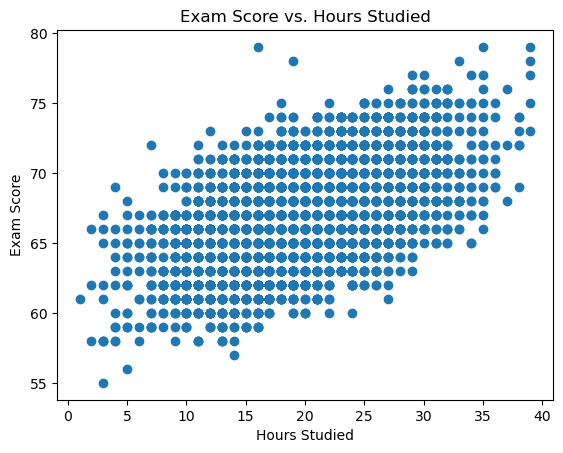

In [22]:
plt.scatter(below_80['Hours_Studied'], below_80['Exam_Score'])
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Exam Score vs. Hours Studied')
plt.show()

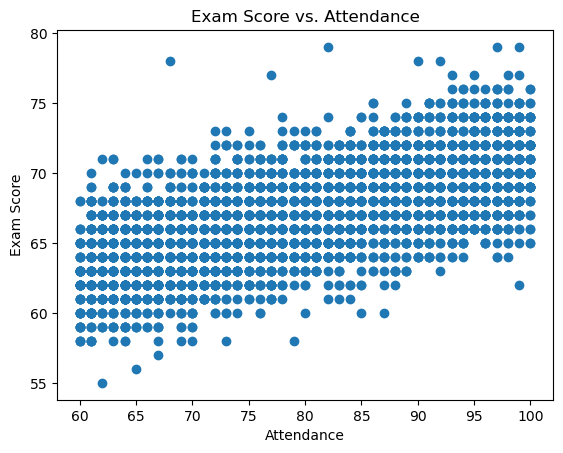

In [23]:
plt.scatter(below_80['Attendance'], below_80['Exam_Score'])
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Exam Score vs. Attendance')
plt.show()

In [24]:
below_80.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.011792,0.003777,0.033287,-0.011106,0.003386,0.521504
Attendance,-0.011792,1.000000,-0.020582,-0.023130,0.013961,-0.032261,0.672433
Sleep_Hours,0.003777,-0.020582,1.000000,-0.011202,-0.012685,-0.006595,-0.018730
Previous_Scores,0.033287,-0.023130,-0.011202,1.000000,-0.022391,-0.004180,0.207595
Tutoring_Sessions,-0.011106,0.013961,-0.012685,-0.022391,1.000000,0.016859,0.181636
Physical_Activity,0.003386,-0.032261,-0.006595,-0.004180,0.016859,1.000000,0.041325
Exam_Score,0.521504,0.672433,-0.018730,0.207595,0.181636,0.041325,1.000000


It seems like among students who scored below 80% on their final exam scores, there are positive linear relationships between exam score vs. hours studied and exam score vs. attendance. These are variables that we could use to help us build a linear model to predict a student's exam score.

## Feature Engineering

We wish to be able to use all of our categorical variables in our models, so we must do some feature engineering to make them compatible.

For any binary categorical variables (e.g. Gender), we will encode the values as 0 and 1.

For ordinal categorical variables, we will convert the character values to numbers based on the proper ordering (e.g. for many variables, "Low"->0, "Medium"->1, "High"->2).

In [25]:
def process_categorical_columns(df):
    """
    Preprocesses the data so that categorical variables are interpreted as such for modeling.
    """
    for col in ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']:
        col_cat = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df[col_cat.columns[0]] = col_cat
        df.drop(columns = col, inplace=True)

    for col in ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality']:
        df[col] = pd.Categorical(df[col], categories=["Low", "Medium", "High"], ordered = True).codes

    df['Peer_Influence'] = pd.Categorical(df['Peer_Influence'], categories=["Negative", "Neutral", "Positive"], ordered = True).codes
    df['Parental_Education_Level'] = pd.Categorical(df['Parental_Education_Level'], categories=["High School", "College", "Postgraduate"], ordered = True).codes
    
    df = df[['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities_Yes', 'Sleep_Hours',
    'Previous_Scores', 'Motivation_Level', 'Internet_Access_Yes', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
    'School_Type_Public', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities_Yes', 'Parental_Education_Level', 'Gender_Male', 'Exam_Score']]
    
    return df

In [26]:
df_train = process_categorical_columns(df_train)
df_test = process_categorical_columns(df_test)

## Ordinary Least Squares

In [27]:
numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
scaler = StandardScaler()
X_train_numeric = df_train[numeric_columns]
X_train_numeric = scaler.fit_transform(X_train_numeric)
df_train[numeric_columns] = X_train_numeric

X_test_numeric = df_test[numeric_columns]
X_test_numeric = scaler.fit_transform(X_test_numeric)
df_test[numeric_columns] = X_test_numeric

In [28]:
lm = smf.ols(formula='Exam_Score ~ Hours_Studied + Attendance + C(Parental_Involvement) + C(Access_to_Resources) + C(Extracurricular_Activities_Yes) + Sleep_Hours + Previous_Scores + C(Motivation_Level) + C(Internet_Access_Yes) + Tutoring_Sessions + C(Family_Income) + C(Teacher_Quality) + C(School_Type_Public) + C(Peer_Influence) + Physical_Activity + C(Learning_Disabilities_Yes) + C(Parental_Education_Level) + C(Gender_Male)', data=df_train)
lm = lm.fit()

In [29]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     476.6
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:53:45   Log-Likelihood:                -11267.
No. Observations:                5154   AIC:                         2.259e+04
Df Residuals:                    5128   BIC:                         2.276e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 61.6708      0.199    309.533      0.000      61.280      62.061
C(Parental_Involvement)[T.1]               0.9381      0.079     11.808      0.000       0.782       1.094
C(Parental_Involvement)[T.2]               2.0458      0.088     23.373      0.000       1.874       2.217
C(Access_to_Resources)[T.1]                1.1000      0.080     13.777      0.000       0.944       1.257
C(Access_to_Resources)[T.2]                2.0935      0.087     23.958      0.000       1.922       2.265
C(Extracurricular_Activities_Yes)[T.1]     0.5417      0.061      8.828      0.000       0.421       0.662
C(Motivation_Level)[T.1]                   0.4994      0.070      7.111      0.000       0.362       0.637
C(Motivation_Level)[T.2]                   0.9971      0.088     11.366      0.000       0.825       1.169
C(Internet_Access_Yes)[T.1]                0.8394      0.114      7.368      0.000       0.616       1.063
C(Family_Income)[T.1]                      0.4675      0.067      6.970      0.000       0.336       0.599
C(Family_Income)[T.2]                      1.0618      0.084     12.699      0.000       0.898       1.226
C(Teacher_Quality)[T.1]                    0.5087      0.102      4.989      0.000       0.309       0.709
C(Teacher_Quality)[T.2]                    1.0615      0.109      9.720      0.000       0.847       1.276
C(School_Type_Public)[T.1]                -0.0138      0.065     -0.211      0.833      -0.142       0.114
C(Peer_Influence)[T.1]                     0.4775      0.081      5.859      0.000       0.318       0.637
C(Peer_Influence)[T.2]                     1.0026      0.081     12.418      0.000       0.844       1.161
C(Learning_Disabilities_Yes)[T.1]         -0.9232      0.099     -9.309      0.000      -1.118      -0.729
C(Parental_Education_Level)[T.1]           0.4488      0.070      6.448      0.000       0.312       0.585
C(Parental_Education_Level)[T.2]           0.9455      0.080     11.880      0.000       0.789       1.102
C(Gender_Male)[T.1]                       -0.0534      0.061     -0.876      0.381      -0.173       0.066
Hours_Studied                              1.7216      0.030     57.151      0.000       1.663       1.781
Attendance                                 2.2889      0.030     75.835      0.000       2.230       2.348
Sleep_Hours                               -0.0125      0.030     -0.414      0.679      -0.072       0.047
Previous_Scores                            0.7197      0.030     23.841      0.000       0.661       0.779
Tutoring_Sessions                          0.6394      0.030     21.226      0.000       0.580       0.698
Physical_Activity                          0.1972      0.030      6.531      0.000     

Based on the p-values for the above model, it seems like School Type, Gender, and Sleep Hours are not significant. Let's fit our model again with these variables removed.

In [30]:
df_train.drop(columns = ['Sleep_Hours', 'School_Type_Public', 'Gender_Male'], inplace=True)
df_test.drop(columns = ['Sleep_Hours', 'School_Type_Public', 'Gender_Male'], inplace=True)

In [31]:
lm = smf.ols(formula='Exam_Score ~ Hours_Studied + Attendance + C(Parental_Involvement) + C(Access_to_Resources) + C(Extracurricular_Activities_Yes) + Previous_Scores + C(Motivation_Level) + C(Internet_Access_Yes) + Tutoring_Sessions + C(Family_Income) + C(Teacher_Quality) + C(Peer_Influence) + Physical_Activity + C(Learning_Disabilities_Yes) + C(Parental_Education_Level)', data=df_train)
lm = lm.fit()

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     541.7
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:53:45   Log-Likelihood:                -11268.
No. Observations:                5154   AIC:                         2.258e+04
Df Residuals:                    5131   BIC:                         2.273e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 61.6321      0.191    322.680      0.000      61.258      62.007
C(Parental_Involvement)[T.1]               0.9385      0.079     11.818      0.000       0.783       1.094
C(Parental_Involvement)[T.2]               2.0476      0.087     23.405      0.000       1.876       2.219
C(Access_to_Resources)[T.1]                1.0998      0.080     13.780      0.000       0.943       1.256
C(Access_to_Resources)[T.2]                2.0942      0.087     23.990      0.000       1.923       2.265
C(Extracurricular_Activities_Yes)[T.1]     0.5413      0.061      8.824      0.000       0.421       0.662
C(Motivation_Level)[T.1]                   0.4985      0.070      7.102      0.000       0.361       0.636
C(Motivation_Level)[T.2]                   0.9957      0.088     11.355      0.000       0.824       1.168
C(Internet_Access_Yes)[T.1]                0.8382      0.114      7.360      0.000       0.615       1.061
C(Family_Income)[T.1]                      0.4674      0.067      6.971      0.000       0.336       0.599
C(Family_Income)[T.2]                      1.0620      0.084     12.706      0.000       0.898       1.226
C(Teacher_Quality)[T.1]                    0.5094      0.102      4.996      0.000       0.309       0.709
C(Teacher_Quality)[T.2]                    1.0620      0.109      9.727      0.000       0.848       1.276
C(Peer_Influence)[T.1]                     0.4753      0.081      5.836      0.000       0.316       0.635
C(Peer_Influence)[T.2]                     1.0015      0.081     12.410      0.000       0.843       1.160
C(Learning_Disabilities_Yes)[T.1]         -0.9210      0.099     -9.294      0.000      -1.115      -0.727
C(Parental_Education_Level)[T.1]           0.4491      0.070      6.454      0.000       0.313       0.585
C(Parental_Education_Level)[T.2]           0.9456      0.080     11.885      0.000       0.790       1.102
Hours_Studied                              1.7215      0.030     57.162      0.000       1.662       1.781
Attendance                                 2.2895      0.030     75.907      0.000       2.230       2.349
Previous_Scores                            0.7197      0.030     23.850      0.000       0.661       0.779
Tutoring_Sessions                          0.6398      0.030     21.245      0.000       0.581       0.699
Physical_Activity                          0.1974      0.030      6.541      0.000       0.138       0.257
==============================================================================
Omnibus:                     8262.643   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3307426.845
Skew:                          10.686   Prob(JB):               

In [33]:
y_pred = lm.predict(df_test.drop(columns=['Exam_Score']))

In [34]:
print(f"Test MSE: {mean_squared_error(y_pred, df_test['Exam_Score'])}")
print(f"Test R^2: {r2_score(y_pred, df_test['Exam_Score'])}")

Test MSE: 3.074135505401219
Test R^2: 0.7202366365306413


## Regularization with LASSO and Ridge

We will now use K-fold CV to construct LASSO and Ridge regression models to try to find the best model that should generalize well to the test data.

In [35]:
lasso_cv = LassoCV(cv=5, random_state=265)
lasso_cv.fit(df_train.drop(columns='Exam_Score'), df_train['Exam_Score'])

LassoCV(cv=5, random_state=265)

In [36]:
print(f"Best Alpha is {lasso_cv.alpha_}")
print(f"Best Coefficients are {lasso_cv.coef_}")

Best Alpha is 0.002233146921361557
Best Coefficients are [ 1.71932326  2.28742685  1.02530591  1.0381256   0.53045093  0.71776306
  0.49298836  0.80551818  0.63832196  0.51641172  0.52928941  0.50134187
  0.19457342 -0.89514834  0.46693121]


In [37]:
y_pred_lasso_cv = lasso_cv.predict(df_test.drop(columns='Exam_Score'))

In [38]:
print(f"LASSO CV MSE: {mean_squared_error(y_pred_lasso_cv, df_test['Exam_Score'])}")
print(f"LASSO CV R^2: {r2_score(y_pred_lasso_cv, df_test['Exam_Score'])}")

LASSO CV MSE: 3.0670223501521785
LASSO CV R^2: 0.7196467219024816


The LASSO model did not drive any of the feature coefficients to 0, so we don't need to remove any more features from our model. Additionally, we see that the test MSE has slightly improved over our last linear model.

Now that we are confident that we have the right features, let's fit a Ridge Regression model to make our model more robust and generalizable to the test data.

In [39]:
ridge = RidgeCV(cv=5, alphas=[0.01, 0.05, 0.1, 1, 5, 7, 8, 9, 10])
ridge.fit(df_train.drop(columns='Exam_Score'), df_train['Exam_Score'])

RidgeCV(alphas=[0.01, 0.05, 0.1, 1, 5, 7, 8, 9, 10], cv=5)

In [40]:
print(f"Best Alpha is {ridge.alpha_}")
print(f"Best Coefficients are {ridge.coef_}")

Best Alpha is 9.0
Best Coefficients are [ 1.71850414  2.28577967  1.02617172  1.03911213  0.5356489   0.71880042
  0.49577268  0.81694642  0.63943703  0.51891144  0.53297769  0.503662
  0.19656468 -0.90249398  0.46930286]


In [41]:
y_pred_ridge = ridge.predict(df_test.drop(columns='Exam_Score'))

In [42]:
print(f"Ridge CV MSE: {mean_squared_error(y_pred_ridge, df_test['Exam_Score'])}")
print(f"Ridge CV R^2: {r2_score(y_pred_ridge, df_test['Exam_Score'])}")

Ridge CV MSE: 3.0668072954441583
Ridge CV R^2: 0.7197890472147879


As you can see, this model has an even lower test MSE than the LASSO model. Furthermore, you can see in the plot below that most of the predicted exam scores are very close to the actual exam scores.

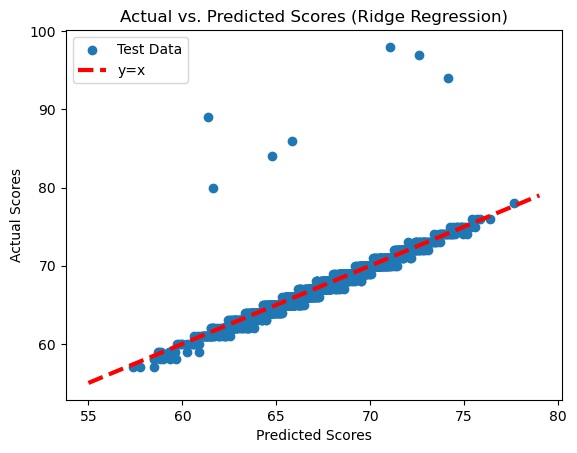

In [43]:
plt.scatter(y_pred_ridge, df_test['Exam_Score'], label='Test Data')
plt.plot(np.arange(55, 80, 1), np.arange(55, 80, 1), linestyle='--', linewidth=3, color='red', label='y=x')
plt.xlabel('Predicted Scores')
plt.ylabel('Actual Scores')
plt.title('Actual vs. Predicted Scores (Ridge Regression)')
plt.legend()
plt.show()